## Q.1	Compute and plot those feature which are related to each other?

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine=pd.read_csv(r'Wine.csv')
print(wine.shape)
wine.head()

(178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
wine.describe(include="all")

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


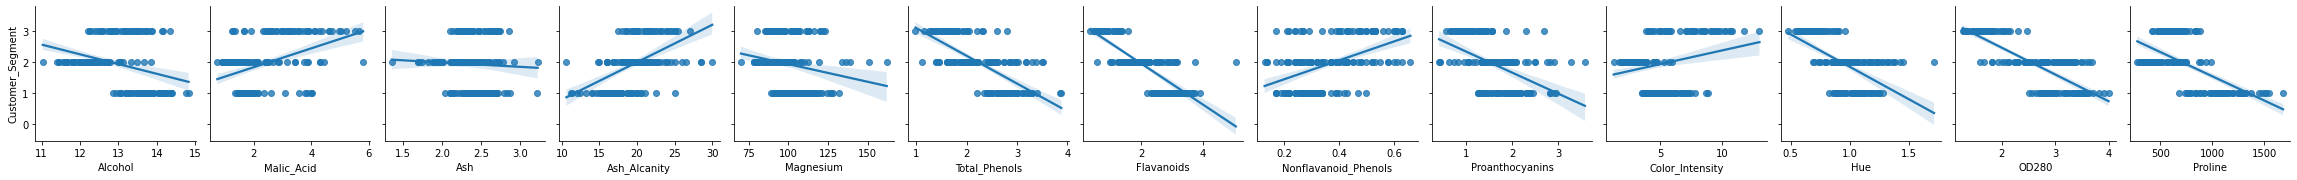

In [4]:
sns.pairplot(wine,x_vars=['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline'],y_vars="Customer_Segment",kind='reg')

<function matplotlib.pyplot.show(close=None, block=None)>

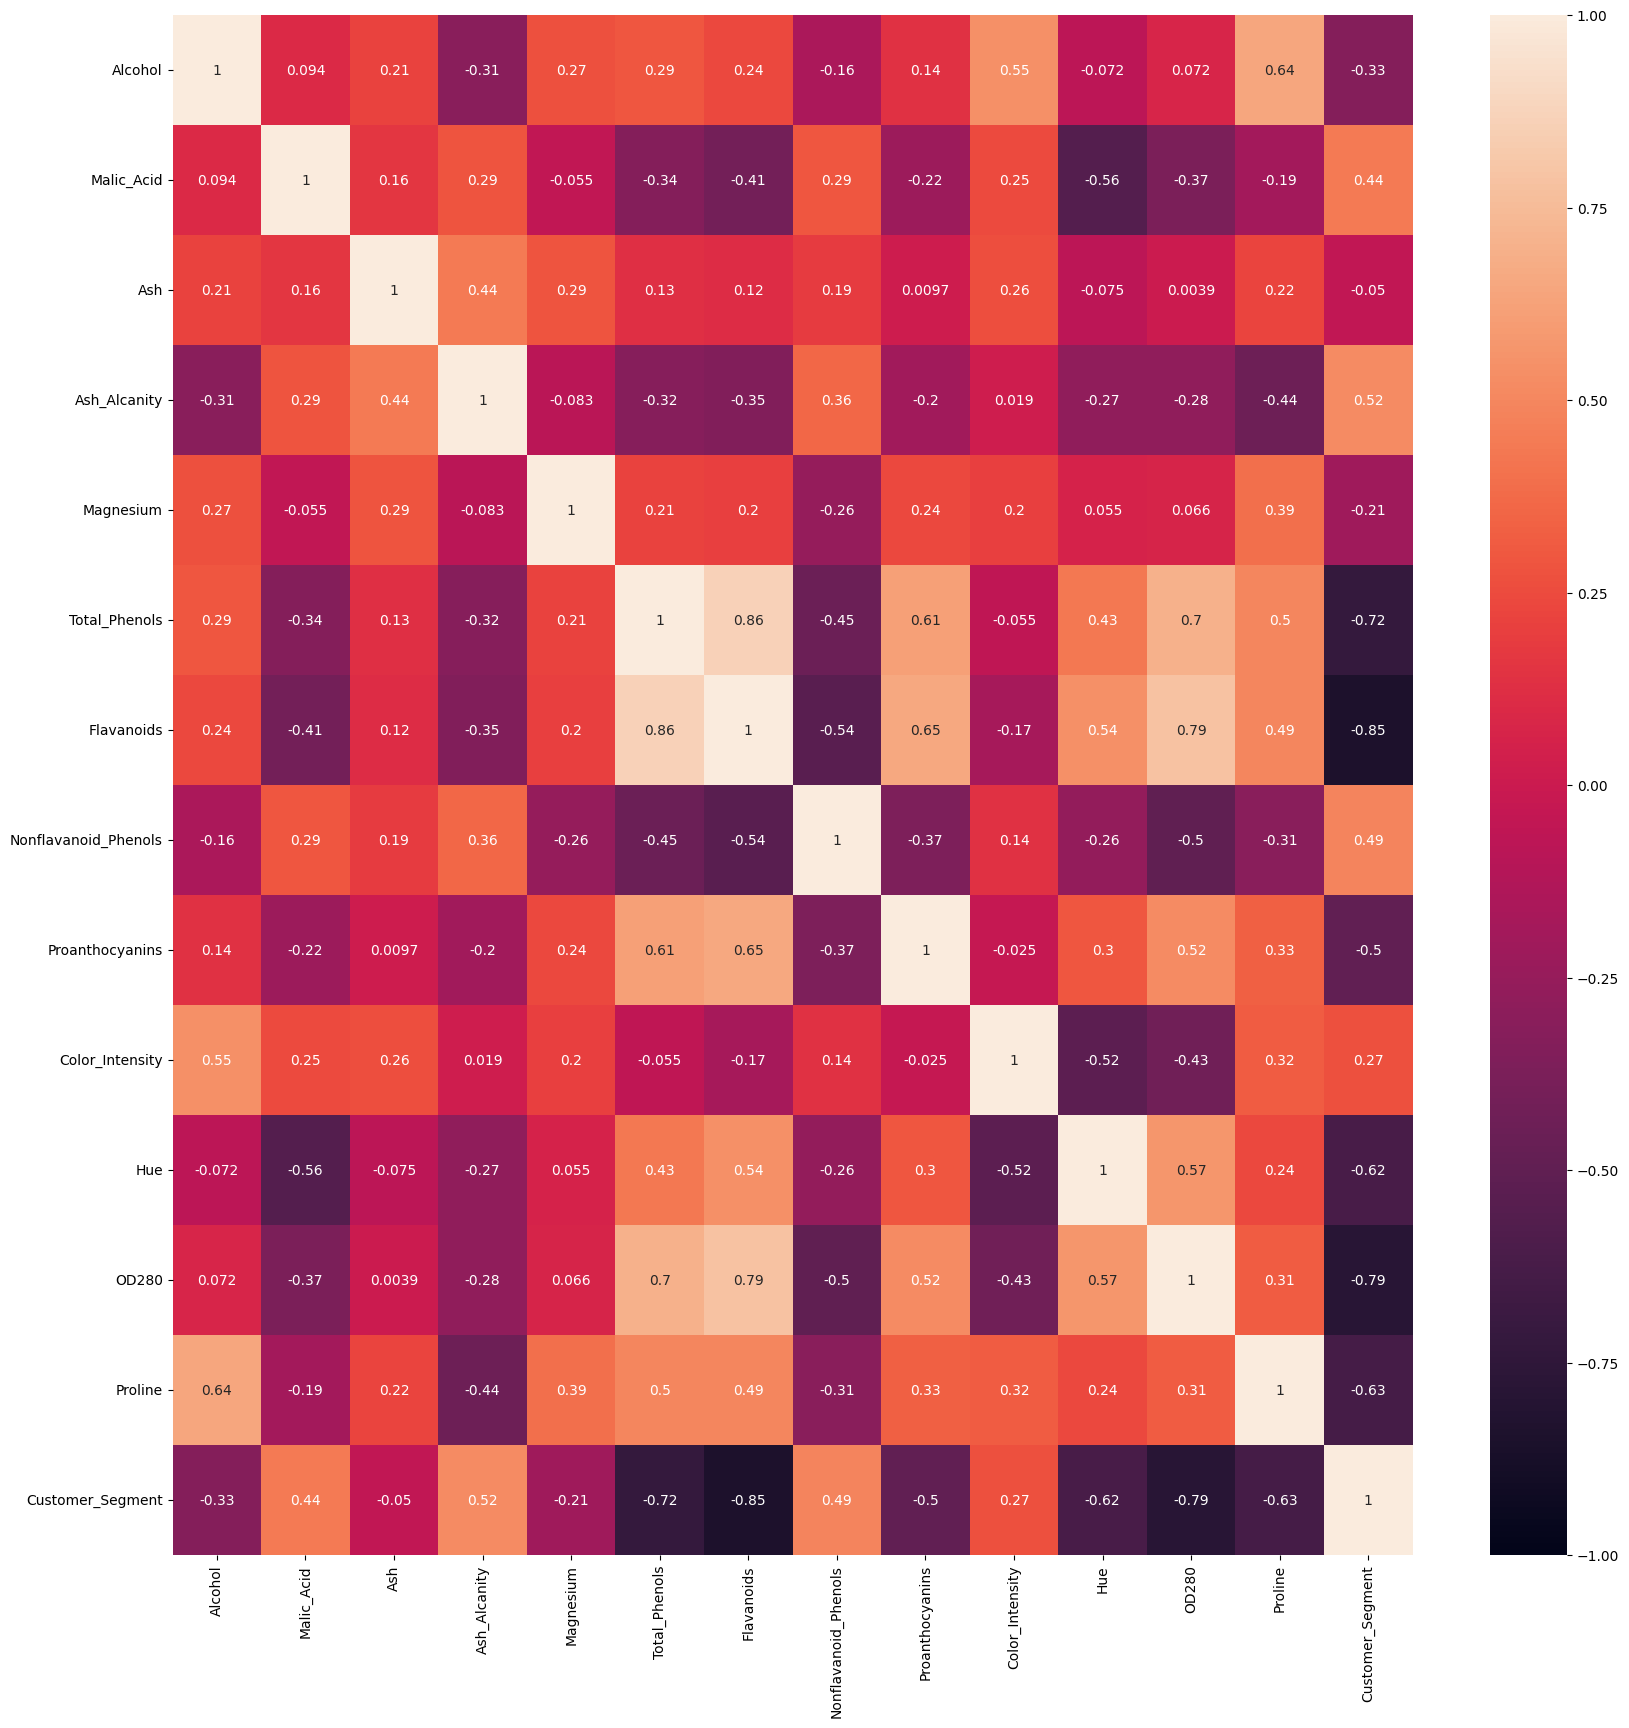

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df= wine.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True)
plt.show

In [6]:
X=wine.values[:,0:-1]
Y=wine.values[:,-1]

In [7]:
print(X.shape)
print(Y.shape)

(178, 13)
(178,)


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


## Q.3	Build a KNN classifier considering optimal number of principal components and value of K and state its score.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='manhattan')

# fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(2.0, 3.0), (2.0, 2.0), (1.0, 3.0), (2.0, 2.0), (1.0, 1.0), (2.0, 2.0), (2.0, 2.0), (1.0, 3.0), (3.0, 3.0), (1.0, 1.0), (1.0, 1.0), (2.0, 2.0), (1.0, 1.0), (2.0, 2.0), (2.0, 2.0), (2.0, 2.0), (2.0, 3.0), (2.0, 3.0), (2.0, 3.0), (3.0, 2.0), (1.0, 1.0), (3.0, 3.0), (1.0, 1.0), (1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (2.0, 3.0), (3.0, 3.0), (2.0, 2.0), (2.0, 2.0), (3.0, 2.0), (3.0, 2.0), (2.0, 1.0), (3.0, 3.0), (2.0, 2.0), (1.0, 1.0)]


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("classification_report: ")

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("accuracy_score of the mobel",acc)

[[ 8  0  2]
 [ 1 12  5]
 [ 0  3  5]]
classification_report: 
              precision    recall  f1-score   support

         1.0       0.89      0.80      0.84        10
         2.0       0.80      0.67      0.73        18
         3.0       0.42      0.62      0.50         8

    accuracy                           0.69        36
   macro avg       0.70      0.70      0.69        36
weighted avg       0.74      0.69      0.71        36

accuracy_score of the mobel 0.6944444444444444


In [11]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,31):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is  0.6944444444444444 for K-Value: 1
Accuracy is  0.6111111111111112 for K-Value: 2
Accuracy is  0.6944444444444444 for K-Value: 3
Accuracy is  0.75 for K-Value: 4
Accuracy is  0.7222222222222222 for K-Value: 5
Accuracy is  0.7222222222222222 for K-Value: 6
Accuracy is  0.6944444444444444 for K-Value: 7
Accuracy is  0.6944444444444444 for K-Value: 8
Accuracy is  0.6666666666666666 for K-Value: 9
Accuracy is  0.6388888888888888 for K-Value: 10
Accuracy is  0.6944444444444444 for K-Value: 11
Accuracy is  0.6666666666666666 for K-Value: 12
Accuracy is  0.75 for K-Value: 13
Accuracy is  0.7222222222222222 for K-Value: 14
Accuracy is  0.6944444444444444 for K-Value: 15
Accuracy is  0.7222222222222222 for K-Value: 16
Accuracy is  0.6944444444444444 for K-Value: 17
Accuracy is  0.6666666666666666 for K-Value: 18
Accuracy is  0.6666666666666666 for K-Value: 19
Accuracy is  0.6666666666666666 for K-Value: 20
Accuracy is  0.6944444444444444 for K-Value: 21
Accuracy is  0.69444444444444

In [12]:
my_dict
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

4 : 0.75
13 : 0.75


In [13]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors= 13,metric='manhattan')

# fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(2.0, 3.0), (2.0, 2.0), (1.0, 3.0), (2.0, 2.0), (1.0, 1.0), (2.0, 2.0), (2.0, 2.0), (1.0, 3.0), (3.0, 3.0), (1.0, 1.0), (1.0, 1.0), (2.0, 2.0), (1.0, 1.0), (2.0, 2.0), (2.0, 2.0), (2.0, 2.0), (2.0, 2.0), (2.0, 3.0), (2.0, 3.0), (3.0, 3.0), (1.0, 1.0), (3.0, 3.0), (1.0, 1.0), (1.0, 1.0), (2.0, 2.0), (3.0, 2.0), (2.0, 3.0), (3.0, 3.0), (2.0, 2.0), (2.0, 2.0), (3.0, 2.0), (3.0, 3.0), (2.0, 1.0), (3.0, 3.0), (2.0, 2.0), (1.0, 1.0)]


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[ 8  0  2]
 [ 1 13  4]
 [ 0  2  6]]
Classification report: 
              precision    recall  f1-score   support

         1.0       0.89      0.80      0.84        10
         2.0       0.87      0.72      0.79        18
         3.0       0.50      0.75      0.60         8

    accuracy                           0.75        36
   macro avg       0.75      0.76      0.74        36
weighted avg       0.79      0.75      0.76        36

Accuracy of the model: 0.75


# Testing the model by taking some value as input

In [15]:
row= {'Alcohol': 13.78,
      'Malic_Acid':2.76,
      'Ash':2.3,
      'Ash_Alcanity':22,
      'Magnesium':90,
      'Total_Phenols':1.35,
      'Flavanoids':0.6,
      'Nonflavanoid_Phenols':0.41,
      'Proanthocyanins':1.03,
      'Color_Intensity':9.58,
      'Hue':0.7,
      'OD280':1.68,
     'proline':615}
test_data = pd.DataFrame(data= row, index=[0])
test_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,proline
0,13.78,2.76,2.3,22,90,1.35,0.6,0.41,1.03,9.58,0.7,1.68,615


In [16]:
Y_pred_temp=model_KNN.predict(test_data)
Y_pred_temp

array([3.])

## Q.5	Build a Naive Bayes Classifier and comment about its accuracy.

In [17]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

#model=BernoulliNB(alpha=1.0,binarize=0.0)
#Alpha--> value for Laplacian correction method to avoid the zero frequency problem
model=MultinomialNB(alpha=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print("classification_report",classification_report(Y_test,Y_pred))
print("accuracy_score",accuracy_score(Y_test,Y_pred))

[[ 8  2  0]
 [ 1 14  3]
 [ 0  0  8]]
classification_report               precision    recall  f1-score   support

         1.0       0.89      0.80      0.84        10
         2.0       0.88      0.78      0.82        18
         3.0       0.73      1.00      0.84         8

    accuracy                           0.83        36
   macro avg       0.83      0.86      0.84        36
weighted avg       0.85      0.83      0.83        36

accuracy_score 0.8333333333333334


In [19]:
#predicting using the Naive_Bayes_Classifier
from sklearn.naive_bayes import GaussianNB

model_NB=GaussianNB()

#fit the model on the data and predict the values
model_NB.fit(X_train,Y_train)
Y_pred=model_NB.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print("classification_report\n",classification_report(Y_test,Y_pred))
print("accuracy_score",accuracy_score(Y_test,Y_pred))

[[10  0  0]
 [ 1 14  3]
 [ 0  0  8]]
classification_report
               precision    recall  f1-score   support

         1.0       0.91      1.00      0.95        10
         2.0       1.00      0.78      0.88        18
         3.0       0.73      1.00      0.84         8

    accuracy                           0.89        36
   macro avg       0.88      0.93      0.89        36
weighted avg       0.91      0.89      0.89        36

accuracy_score 0.8888888888888888


## Q.4	Build a SVM Classifier and tune the hyperparameters to get the optimum model.

In [21]:
from sklearn.svm import SVC
# create a mobel
svc_model=SVC()
#fitting training data to the model
svc_model.fit(X_train,Y_train)

Y_pred=svc_model.predict(X_test)
print(Y_pred)

[3. 2. 3. 2. 1. 2. 2. 3. 3. 1. 3. 2. 1. 2. 2. 2. 2. 3. 2. 3. 1. 2. 1. 1.
 2. 3. 3. 3. 3. 2. 2. 2. 1. 3. 2. 1.]


In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print("classification_report",classification_report(Y_test,Y_pred))
print("accuracy_score",accuracy_score(Y_test,Y_pred))

[[ 7  0  3]
 [ 1 13  4]
 [ 0  3  5]]
classification_report               precision    recall  f1-score   support

         1.0       0.88      0.70      0.78        10
         2.0       0.81      0.72      0.76        18
         3.0       0.42      0.62      0.50         8

    accuracy                           0.69        36
   macro avg       0.70      0.68      0.68        36
weighted avg       0.74      0.69      0.71        36

accuracy_score 0.6944444444444444


In [23]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [24]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.379, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.379, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.393, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.357, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.357, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.379, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.379, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.379, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.464, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.357, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.393, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.655, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.586, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [25]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [26]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=100,gamma=0.001)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

[1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 3.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 1.0, 3.0, 3.0, 1.0, 3.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 2.0, 1.0]


In [27]:
grid_predictions = grid.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print("classification_report",classification_report(Y_test,Y_pred))
print("accuracy_score",accuracy_score(Y_test,Y_pred))

[[ 9  0  1]
 [ 4 12  2]
 [ 0  3  5]]
classification_report               precision    recall  f1-score   support

         1.0       0.69      0.90      0.78        10
         2.0       0.80      0.67      0.73        18
         3.0       0.62      0.62      0.62         8

    accuracy                           0.72        36
   macro avg       0.71      0.73      0.71        36
weighted avg       0.73      0.72      0.72        36

accuracy_score 0.7222222222222222


In [29]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

         1.0       0.69      0.90      0.78        10
         2.0       0.80      0.67      0.73        18
         3.0       0.62      0.62      0.62         8

    accuracy                           0.72        36
   macro avg       0.71      0.73      0.71        36
weighted avg       0.73      0.72      0.72        36



 ## Q.6	Compare all of the models and justify your choice about the optimum model.

###  - Naive_Bayes_Classifier GaussianNB is the best model for it compaire to other model
### - for Naive_Bayes_GaussianNB the accuracy is(accuracy_score 0.8888888888888888)
### - AND SVM accuryacy is after tuning is (0.722222222222222)
### - For the KNN the Accuracy of the model: 0.75
###  -This is why Naive_Bayes_Classifier GaussianNB  is the best model.

 ## Q.2	What are the optimum number of principal components in PCA?

# Step 1: Importing the data set

In [31]:

dataset = pd.read_csv('wine.csv')
  
# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Step 2: Splitting the dataset into the Training set and Test set 

In [32]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Step 3: Feature Scaling

In [33]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 0.87668336  0.79842885  0.64412971 ...  0.0290166  -1.06412236
  -0.2059076 ]
 [-0.36659076 -0.7581304  -0.39779858 ...  0.0290166  -0.73083231
  -0.81704676]
 [-1.69689407 -0.34424759 -0.32337513 ...  0.90197362  0.51900537
  -1.31256499]
 ...
 [-0.70227477 -0.68615078 -0.65828065 ...  0.46549511  0.51900537
  -1.31256499]
 [ 1.13777093 -0.62316862 -0.91876272 ... -0.18922266  1.03282752
   0.80164614]
 [ 1.4610222   0.12361993  0.42085937 ... -1.45501034 -1.2168803
  -0.2719767 ]]


# Step 4: Applying PCA function

In [34]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_
print(pca)
print(explained_variance)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
[0.36884109 0.19318394]


# Step 5: Fitting Logistic Regression To the training set

In [35]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Step 6: Predicting the test set result 

In [36]:
# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test)
print(y_pred)

[1 3 2 1 2 1 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


# Step 7: Making the confusion matrix 

In [37]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


# Step 8: Predicting the training set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


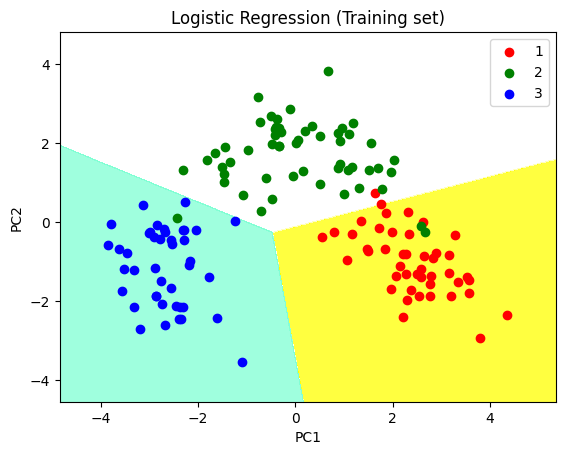

In [38]:
# Predicting the training set
# result through scatter plot 
from matplotlib.colors import ListedColormap
  
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
  
# show scatter plot
plt.show()

# Step 9: Visualizing the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


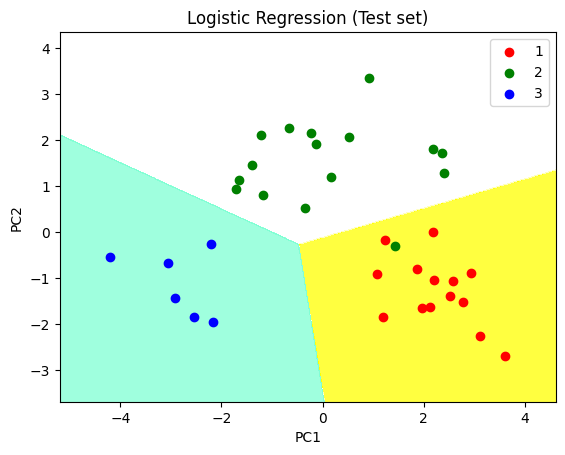

In [39]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = X_test, y_test
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
# title for scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
  
# show scatter plot
plt.show()
